<a href="https://colab.research.google.com/github/dkaratzas/XNAP_Profs/blob/main/W01_01_Intro_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pol Gràcia Espelt - 1533358


# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed


## Import the library

In [1]:
import torch

## Getting help in Jupyter

In [2]:
torch.sqrt # <Tab>

<function _VariableFunctionsClass.sqrt>

In [3]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [4]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [5]:
# Annotate your functions / classes!
torch.nn.Module?

In [6]:
torch.nn.Module??

## Torch!

In [7]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [8]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [9]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [10]:
t

tensor([[[-5.6384e+05,  3.0641e-41,  7.0065e-44,  6.8664e-44],
         [ 6.3058e-44,  6.7262e-44,  7.0065e-44,  6.3058e-44],
         [ 7.0065e-44,  7.4269e-44,  1.1771e-43,  6.8664e-44]],

        [[ 6.7262e-44,  8.1275e-44,  7.2868e-44,  7.7071e-44],
         [ 8.1275e-44,  7.2868e-44,  6.8664e-44,  6.4460e-44],
         [ 7.1466e-44,  6.8664e-44,  7.7071e-44,  7.9874e-44]]])

In [11]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[7., 4., 0., 4.],
         [1., 2., 6., 5.],
         [8., 1., 4., 8.]],

        [[3., 9., 2., 1.],
         [6., 2., 5., 1.],
         [5., 1., 8., 0.]]])

In [12]:
r = t.view(3, 8)
r

tensor([[7., 4., 0., 4., 1., 2., 6., 5.],
        [8., 1., 4., 8., 3., 9., 2., 1.],
        [6., 2., 5., 1., 5., 1., 8., 0.]])

In [13]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [15]:
# What are strides. And how are they related to shapes?
print(t.stride(), r.stride())
##Els strides és quants elements m'haig de moure per accedir al següent element d'aquella dimensió. Mirarho en funció del shape.
print(t.shape, r.shape)

(12, 4, 1) (8, 1)
torch.Size([2, 3, 4]) torch.Size([3, 8])


In [16]:
# Let's try that again without doing the operations in place
t.random_(10)

tensor([[[5., 2., 2., 3.],
         [2., 1., 8., 5.],
         [1., 3., 3., 8.]],

        [[0., 0., 8., 5.],
         [9., 5., 2., 9.],
         [2., 7., 8., 0.]]])

In [17]:
# Not in place
r = t.view(3, 8)
r, r[1,3]

(tensor([[5., 2., 2., 3., 2., 1., 8., 5.],
         [1., 3., 3., 8., 0., 0., 8., 5.],
         [9., 5., 2., 9., 2., 7., 8., 0.]]), tensor(8.))

In [18]:
r = torch.zeros_like(r)
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
t

tensor([[[5., 2., 2., 3.],
         [2., 1., 8., 5.],
         [1., 3., 3., 8.]],

        [[0., 0., 8., 5.],
         [9., 5., 2., 9.],
         [2., 7., 8., 0.]]])

In [20]:
# What are strides?
print(t.stride(), r.stride())

(12, 4, 1) (8, 1)


In [21]:
# This *is* important
s = r.clone()

In [22]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [24]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [25]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [26]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [27]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [28]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [29]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([1., 0., 6., 7., 9.])

In [30]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 9.0


In [31]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([0., 6.])

In [32]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [33]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [34]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [35]:
m.dim()

2

In [36]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [37]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [38]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [39]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [40]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [41]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [42]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [43]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [44]:
# Scalar product
m @ v

tensor([49., 47.])

In [45]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[0, :] @ v

tensor(49.)

In [46]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [47]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.3088, 5.5616, 3.8642, 7.4203],
        [4.1440, 2.7119, 1.9159, 9.5542]])

In [48]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.7735, 4.0767, 2.0564, 6.3057],
        [3.8012, 1.8334, 0.2247, 8.7854]])

In [49]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.3462, 2.8972, 0.3537, 1.1003],
        [3.3738, 0.8279, 0.7858, 7.3531]])

In [50]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 3.6696,  6.2032,  5.8221, 80.2295],
        [11.4439,  5.0167,  5.5878, 18.3660]])

In [51]:
m.size()

torch.Size([2, 4])

In [52]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [53]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Broadcasting

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [54]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)
# x and y are broadcastable since all dimensions are equal

x=torch.empty((0,))
y=torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)

# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

In [55]:
# How is the output dimension calculated?
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).size())

x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([5, 3, 4, 1])
torch.Size([3, 1, 7])


## Constructors

In [56]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [57]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [58]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [59]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [60]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [61]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [62]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

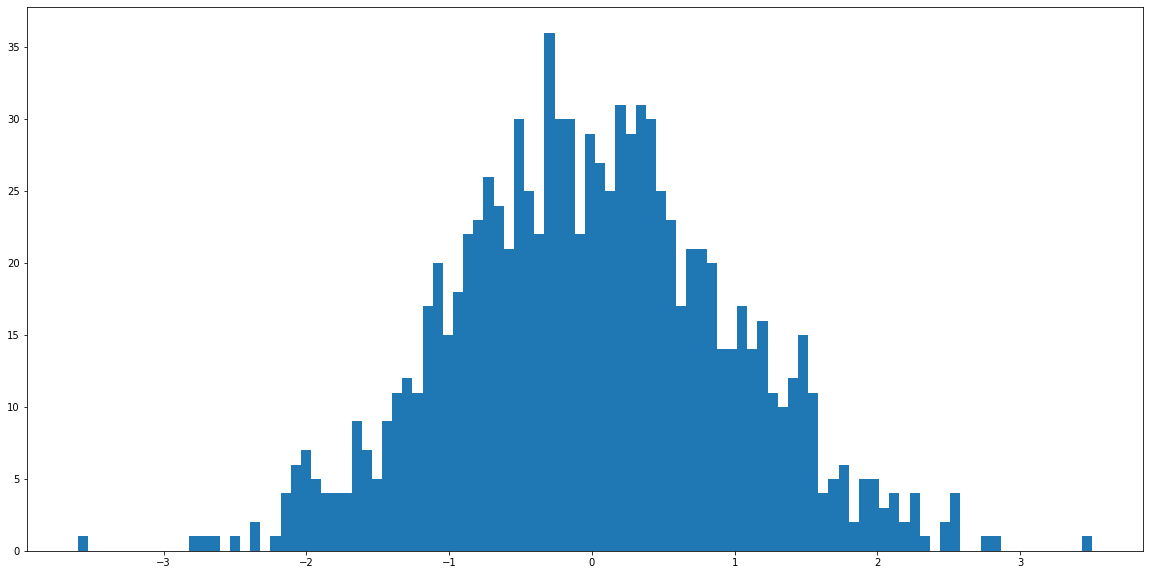

In [63]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

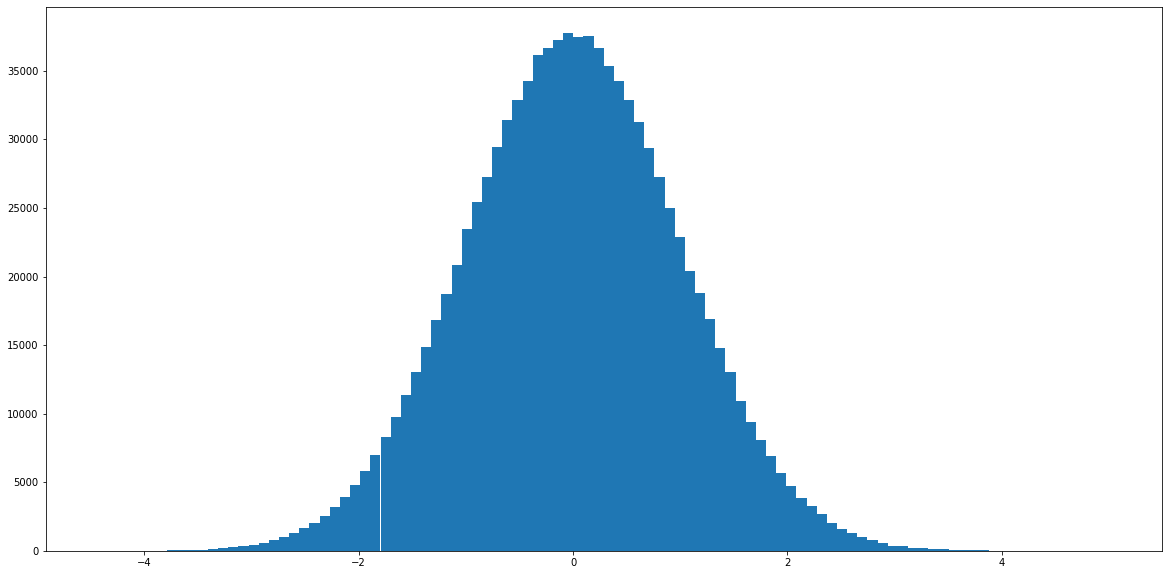

In [64]:
plt.hist(torch.randn(10**6).numpy(), 100);

## Casting

In [65]:
# Helper to get what kind of tensor types
torch.*Tensor?

In [66]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [67]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [68]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [69]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [70]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [71]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [72]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
#comparteixen memoria
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [73]:
# In-place multiplication of all elements by 2 for tensor n
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## Using the GPU

In [74]:
import torch
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use the first gpu available if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [75]:
# Tensors can be moved between gpu and cpu memory

tensor = torch.randn(5, 5) # create a 5x5 matrix filled with random numbers
print(f"tensor's device: {tensor.device}") # by default tensors are stored in cpu memory (RAM)

# Move your tensor to GPU device 0 if there is one (first GPU in the system)
if torch.cuda.is_available():
    tensor = tensor.to(device) # tensor.cuda() is an alternative although not recommended
print(f"tensor's device: {tensor.device}")

tensor's device: cpu
tensor's device: cuda:0


In [76]:
# A common mistake 
a = torch.randn(5, 2, device=device)
b = torch.randn(1, 2) #, device=device)

# This throws an exception, since you can't operate on tensors stored in
# different devices, and the error message is pretty clear about that
c = a * b
c

RuntimeError: ignored

# Gradient Computation



In [ ]:
# Tensors also track the operations applied on them in order to differentiate them

# setting requires_grad to true tells the autograd engine that we want to compute
# gradients for this tensor
a = torch.tensor([2., 3.], requires_grad=True)
print(a.grad)
L = 3*a**3
L.sum().backward()
print(f"Gradient of a with respecto to L: {a.grad}")

Lets check if the computed gradients are correct:

\begin{equation}

\frac{\partial{L}}{\partial{a}} = [9 * a_1^2, 9 * a_2^2] \\
\frac{\partial{L}}{\partial{a}} = [9 * 2^2, 9 * 3^2] \\
\frac{\partial{L}}{\partial{a}} = [36, 81]


\end{equation}

As we can see the gradient vector matches the one computed by the autograd engine (no surprise there)

In [ ]:
# Notice that the output tensor of an operation will require gradients even 
# if only a single input tensor has requires_grad=True.

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does a require gradients? : {a.requires_grad}")
b = x + z
print(f"Does b require gradients?: {b.requires_grad}")

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.

# Homework

A) The code below simulates a tiny neural network, however it throws an exception. As you build neural networks in PyTorch you will see this exception **often**. Look at the error message, explain whats happening and make the necessary changes to the code to get an output from this tiny network

B) Once you manage to sucessfully run the code below notice how the shape of the tensors ```fts``` and ```bias``` are drastically different, yet they can be added together. Which internal PyTorch mechanism makes this addition happen?

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))
fts = torch.mm(features, weights)
print(fts + bias)
print(fts.shape, bias.shape)

# More Homework

C) Answer the following questions about the cell below

1. Does the value of ```t``` change? Why?
2. Does the shape of ```t``` change? Why?
3. Explain, in your own words. What is the stride of a tensor, why is it convenient to have them?
4.  Pick a mathematical operation like cosine or square root (not those though 🙂). Can you find the correspoding function in the [torch library](https://https://pytorch.org/docs/stable/torch.html#pointwise-ops). 
5. Apply the function element-wise to ```a```. Does it return an error? Why? How can it be fixed?
6. Is there a version of the function that operates in place?
7. Run the same funcion on the GPU. Do you notice any difference in runtime? If not, why do you think that is?

In [ ]:
t = torch.tensor(list(range(9)))

a = t.view(3, 3)
a.mul_(2)


## A)

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))
print(bias)
fts = torch.mm(torch.t(features), weights)
print(fts)
print(fts + bias)
print(fts.shape, bias.shape)

En este fragmento de código, se crea en primer lugar un tensor llamado 'features' de 1 fila y 5 columnas con números aleatorios y a continuación otro tensor llamado 'weights' que tiene el mismo tamaño que el tensor 'features' y también se llena de números aleatorios. Finalmente se crea una variable llamada 'bias' que también es un tensor de un sólo elemento aleatorio. La función torch.mm realiza la multiplicación entre los tensores introducidos, en este caso 'features' y 'weights' y cómo es lógico, al tener un tamaño de 1x5 los dos no se pueden multiplicar y además en este caso no se cumplen las condiciones de Broadcasting, por este motivo da error.

Para solucionar el problema debemos transponer la matriz weights para que así pueda ser multiplicado ya que tendran la forma 1x5 y 5x1, dando cómo resultado un tensor 1x1. También podemos transponer la matriz 'features' y en este caso multiplicaremos dos matrizes 5x1 y 1x5 dando cómo resultado un tensor 5x5.

## B)

Que la multiplicación entre el tensor 'fts' de shape 5x5 y el tensor 'bias' de shape 1x1 sea posible es debido al Broadcasting. En este caso, se cumplen las condiciones necesarias

* Cada tensor tiene por lo menos 1 dimension.

* Cuando iteramos sobre las dimensiones, el tamaño de las dimensiones deben ser iguales, una de ellas 1 o una de ellas no existe. 

Vemos que cuando multplicamos el tensor 5x5 con el vector 1x1, en realidad esta haciendo la multiplicacion de fts por el tensor bias repetido en un vector del mismo tamaño que la fila del fts. 

## C)

#### 1)

En este caso, al hacer un copy de 't' a 'a' y modificar los valores de 'a', los valores del vector 't' se ven modificados también ya que se asignan en las mismas posiciones de memoria però no se ve afectado su shape, que se mantiene 1x1, mientras que el tensor 'a' tiene shape 3x3. 

In [77]:
t = torch.tensor(list(range(9)))

a = t.view(3, 3)
a.mul_(2)
print(f'a : {a}\n t : {t}')

a : tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])
 t : tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16])


#### 2) 

La shape de 't' no se ve modificada ya que aunque variamos los valores en memòria, no modificamos su representación (su shape). 

#### 3)

El stride és el núero d'elements d'un vector o matriu que m'haig de moure per tal d'accedir al element de la mateixa dimensió. Es relaciona amb la forma dels arrays o en aquest cas, tensors.

In [165]:
u = torch.arange(12).view(2,3,2)
print(f'u: {u} \nShape: {u.shape}\nStride: {u.stride()}')

u: tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]) 
Shape: torch.Size([2, 3, 2])
Stride: (6, 2, 1)


Per exemple en aquest cas veiem com el vector 'u' té dimensió 2,3,2 i conseqüentment, el seu stride és de forma (6,2,1) ja que per mourens de la dimensió 0, hem de recórrer des del 0 fins al 6, per la següent dimensió hem de recorrer dos posicions, per exemple del 0 al 2, i en la dimensió més interna hem de mourens només una posició per accedir al següent element, del 0 al 1 en aquest cas.

#### 4)

Trio la funció sinus que s'aplica sobre el propi vector. Tensor.sin()

In [167]:
u.sin()


RuntimeError: ignored

#### 5)

Ens surt un RuntimeError ja que aquesta funció no aquesta implementada per valors long. Per solucionar aquest problema hauríem de transformar els valors del vector u a una representació més simple (amb menys bytes).


In [92]:
u = torch.arange(12, dtype = torch.float32)
u.sin()


tensor([ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568, -0.9589, -0.2794,  0.6570,
         0.9894,  0.4121, -0.5440, -1.0000])

#### 6)

Sí, en aquest cas tenim la funció tensor.sin_() que ens modifica els valors de la variable a memòria.

In [93]:
print(f'u abans de la operación inplace: {u}')
u.sin_()
print(f'u després de la operación inplace: {u}')

u abans de la operación inplace: tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
u després de la operación inplace: tensor([ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568, -0.9589, -0.2794,  0.6570,
         0.9894,  0.4121, -0.5440, -1.0000])


#### 7) 

#### Ejecución con cpu:

In [150]:
#Faig una funció que em permet fer proves i visualització de les proves.
import pandas as pd
import plotly.graph_objects as go
from time import time
def prova(valors, step, device):
  df = {'temps(s)':[], 'tamany':[], 'type': []}
  for n in range(0,valors, step):
    tmp = torch.arange(0,n, dtype=torch.float32, device = device)
    time0 = time()
    tmp.sin()
    time1 = time()
    df['temps(s)'].append(time1-time0)
    df['tamany'].append(n)
    df['type'].append(device)
  df = pd.DataFrame(df)
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df.tamany, y=df['temps(s)'], mode = 'lines+markers'))
  fig.update_layout(
    title = f"Temps d'execució de la funció sinus sobre un tensor variant el tamany del tensor en la {device}")
  fig.show()
  print(tmp)
  return df

cpu = prova(100000, 1000, 'cpu')



tensor([0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 9.8997e+04, 9.8998e+04,
        9.8999e+04])


#### Ejecución con gpu:

In [162]:
assert torch.cuda.is_available(), "GPU is not enabled"

gpu = prova(100000, 1000, 'cuda:0')


tensor([0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 9.8997e+04, 9.8998e+04,
        9.8999e+04], device='cuda:0')


Contrast:

Tal i com podem apreciar en les gràfiques, l'operació del sinus sobre els tensors executat en la gpu és notablement més ràpida que sobre la cpu, tot i que quan tenim tensors de tamanys petits (fins a ~10k elements) va més rápid en la cpu.

In [163]:
fig = go.Figure()
fig = go.Figure()
fig.add_trace(go.Scatter(x=cpu['tamany'], y=cpu['temps(s)'],
                    mode='lines+markers',
                    name='CPU'))
fig.add_trace(go.Scatter(x=gpu['tamany'], y=gpu['temps(s)'],
                    mode='lines+markers',
                    name='GPU'))
fig.update_layout(
    title = "Temps d'execució de la funció sinus sobre un tensor variant el tamany del tensor en gpu i cpu")
fig.show()